### EDA and ML Pipeline

### Import 

In [105]:

import subprocess
from pathlib import Path
import pandas as pd

try:
    repo_root = subprocess.run(
        ["git", "rev-parse", "--show-toplevel"],
        capture_output=True,
        text=True,
        check=True
    ).stdout.strip()
except subprocess.CalledProcessError:
    repo_root = Path.cwd()  # fallback if not in a git repo

csv_path = Path(repo_root) / "FullSimDF.csv"
dog_dat = pd.read_csv(csv_path)



In [106]:
dog_dat.head()

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,is_brachycephalic,Energy Level,Playfulness Level,...,Hum_Diff,CBT_simulated,is_old,is_overweight,heat_stress_risk,High_humidity_fordogs,prior_heat_related_injury_est,simulated_heat_injury_flag,target2Category,target3Category
0,Dachshund,8.1,27.6,Female,Sable,Short,Smooth,0.0,2.417733,3.083082,...,8.21,38.609613,0,1,1,1,0.052,1,0,Normal
1,Miniature Schnauzer,7.3,33.8,Female,Black and Tan,Medium,Wiry,0.0,1.724504,4.294767,...,4.44,38.827535,0,1,1,0,0.022,0,0,Normal
2,Chinese Shar-Pei,9.7,24.9,Female,Cream,Short,Smooth,0.0,2.939745,2.236609,...,0.20,38.527102,0,0,0,0,0.002,0,0,Normal
3,Labrador Retriever,11.8,20.5,Male,Sable,Short,Double,0.0,3.322003,3.677264,...,8.45,39.314132,0,0,0,1,0.000,0,0,Normal
4,Yorkshire Terrier,8.0,21.3,Male,Black,Long,Silky,0.0,2.440256,1.254182,...,4.21,38.909960,0,0,0,0,0.002,0,0,Normal


In [107]:
# column names
dog_dat.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'is_brachycephalic', 'Energy Level', 'Playfulness Level',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff',
       'CBT_simulated', 'is_old', 'is_overweight', 'heat_stress_risk',
       'High_humidity_fordogs', 'prior_heat_related_injury_est',
       'simulated_heat_injury_flag', 'target2Category', 'target3Category'],
      dtype='object')

## EDA

In [108]:
import matplotlib.pyplot as plt

### Univariate

(array([1.000e+00, 1.000e+00, 3.000e+00, 3.100e+01, 4.900e+01, 1.380e+02,
        2.780e+02, 6.050e+02, 8.700e+02, 1.382e+03, 1.561e+03, 1.402e+03,
        1.281e+03, 8.230e+02, 4.990e+02, 2.520e+02, 1.260e+02, 4.300e+01,
        7.000e+00, 6.000e+00]),
 array([-10.5  ,  -8.845,  -7.19 ,  -5.535,  -3.88 ,  -2.225,  -0.57 ,
          1.085,   2.74 ,   4.395,   6.05 ,   7.705,   9.36 ,  11.015,
         12.67 ,  14.325,  15.98 ,  17.635,  19.29 ,  20.945,  22.6  ]),
 <BarContainer object of 20 artists>)

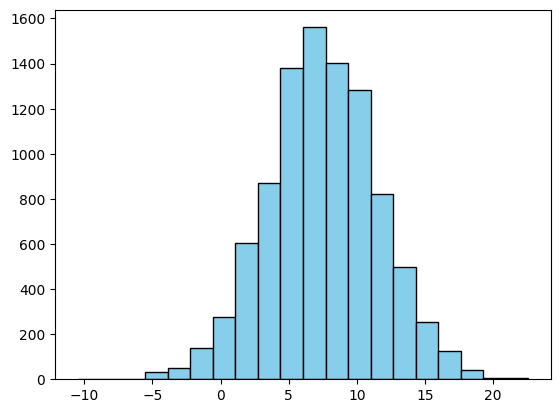

In [109]:
# Ella
plt.hist(dog_dat['Age'], bins=20, color='skyblue', edgecolor='black')
# Age is normally distributed about 7 years

In [110]:
# Kedar

In [111]:
# Swapnil

In [112]:
# Manaswi

### Bivariate

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_82809/2035708879.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, patch_artist=True)


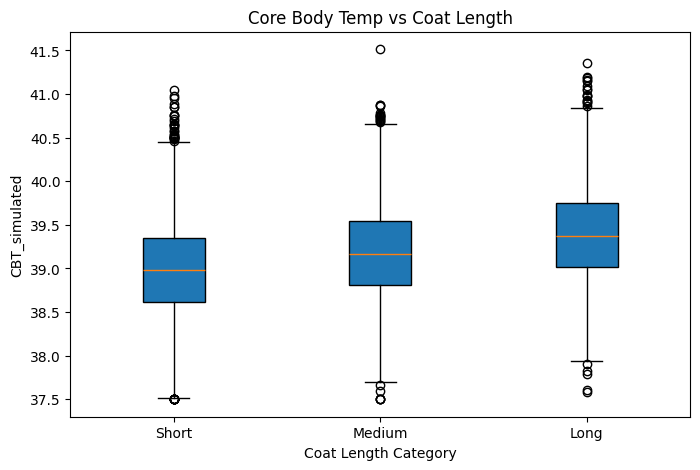

In [113]:
# Ella
cats = dog_dat['Coat Length'].unique()

# Create a list of CBT_simulated arrays, one per coat length category
data = [dog_dat.loc[dog_dat['Coat Length'] == c, 'CBT_simulated'] for c in cats]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=cats, patch_artist=True)
plt.ylabel("CBT_simulated")
plt.xlabel("Coat Length Category")
plt.title("Core Body Temp vs Coat Length")
plt.show()# No clear correlation between coat length and CBT, looks like short and medium tend to have slightly lower 
# minimums of CBT but not by much

In [114]:
# Kedar

In [115]:
# Swapnil

In [116]:
# Manaswi

## Predicting Target Class

In [117]:
# Drop the target columns from X, and core body temp
X = dog_dat.drop(columns=['target2Category', 'target3Category', 'CBT_simulated'])
# Assume X is your feature set without targets
numeric_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(include=['object', 'category'])
# One-hot encode categorical features
X_cat_encoded = pd.get_dummies(categorical_features, drop_first=True)
X_encoded = pd.concat([numeric_features, X_cat_encoded], axis=1)

# Binary target
y2 = dog_dat['target2Category']

# 3-class target
y3 = dog_dat['target3Category']
ordered_levels = ["Normal", "Heat Stress", "Heat Stroke"]
y3_cat = pd.Categorical(y3, categories=ordered_levels, ordered=True)
y3_num = y3.astype('category').cat.codes

### Using Binary Target Class

In [118]:
# correlation-based feature selection 
df2 = X_encoded.copy()
df2['target2'] = y2
corr_matrix2 = df2.corr()
target_corr2 = corr_matrix2['target2'].drop('target2')
print("Feature correlations with 2-class target:")
print(target_corr2.sort_values(ascending=False))


Feature correlations with 2-class target:
T_device               0.400184
Ambient_Temp           0.339164
Temp_Diff              0.320268
Sun Exposure           0.278861
Hum_Diff               0.273947
                         ...   
Season_Spring         -0.041961
Coat Type_Smooth      -0.136644
Coat Length_Short     -0.147595
Wind Cooling Effect   -0.154848
Season_Winter         -0.178289
Name: target2, Length: 104, dtype: float64


In [119]:
relevant_features2 = target_corr2[abs(target_corr2) > 0.1].index  # keep features with |corr| > 0.1
X2_filtered = X_encoded[relevant_features2]
X2_filtered.shape

(9358, 16)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
# Binary target train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_filtered, y2, test_size=0.2, random_state=42, stratify=y2
)

In [121]:
# SMOTE for balancing classes (only to training)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X2_train_res, y2_train_res = smote.fit_resample(X2_train, y2_train)
print("Original class distribution:\n", y2_train.value_counts())
print("After SMOTE:\n", y2_train_res.value_counts())


Original class distribution:
 target2Category
0    6560
1     926
Name: count, dtype: int64
After SMOTE:
 target2Category
0    6560
1    6560
Name: count, dtype: int64


### Using Three Class Target

In [122]:
# correlation-based feature selection
# 3-class target: convert to numeric

df3 = X_encoded.copy()
df3['target3'] = y3_num
corr_matrix3 = df3.corr()
target_corr3 = corr_matrix3['target3'].drop('target3')

print("Feature correlations with 3-class target:")
print(target_corr3.sort_values(ascending=False))


Feature correlations with 3-class target:
Season_Winter          0.176325
Wind Cooling Effect    0.150579
Coat Length_Short      0.144372
Coat Type_Smooth       0.134582
Season_Spring          0.039056
                         ...   
Hum_Diff              -0.265714
Sun Exposure          -0.267520
Temp_Diff             -0.308097
Ambient_Temp          -0.325511
T_device              -0.384365
Name: target3, Length: 104, dtype: float64


In [123]:
relevant_features3 = target_corr3[abs(target_corr3) > 0.1].index
X3_filtered = X_encoded[relevant_features3]
X3_filtered.shape

(9358, 16)

In [129]:
# Train test split
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3_filtered, y3_num, test_size=0.2, random_state=42, stratify=y3
)

In [130]:
# SMOTE with 3 classes (training only)
smote3 = SMOTE(random_state=42)
X3_train_res, y3_train_res = smote3.fit_resample(X3_train, y3_train)
print("Original class distribution:\n", y3_train.value_counts())
print("After SMOTE:\n", y3_train_res.value_counts())

Original class distribution:
 2    6561
0     886
1      39
Name: count, dtype: int64
After SMOTE:
 2    6561
0    6561
1    6561
Name: count, dtype: int64


Now we are ready to fit ML models below (Use 2-class training and testing or 3-class training and testing) 
-  If you want to use a BINARY CLASSIFIER MODEL: X2_train_res, X2_test, y2_train_res, y2_test
- If you want to use a MULTI-CLASS CLASSIFIER MODEL: X3_train_res, X3_test, y3_train_res, y3_test

In [131]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
# Ella

# XGBOOST for 2-class target
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X2_train_res, y2_train_res)
y2_pred = xgb_model.predict(X2_test)
y2_proba = xgb_model.predict_proba(X2_test)


print(classification_report(y2_test, y2_pred))
print(confusion_matrix(y2_test, y2_pred))


              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1641
           1       0.32      0.56      0.41       231

    accuracy                           0.80      1872
   macro avg       0.63      0.70      0.65      1872
weighted avg       0.86      0.80      0.82      1872

[[1373  268]
 [ 102  129]]


<Figure size 1000x800 with 0 Axes>

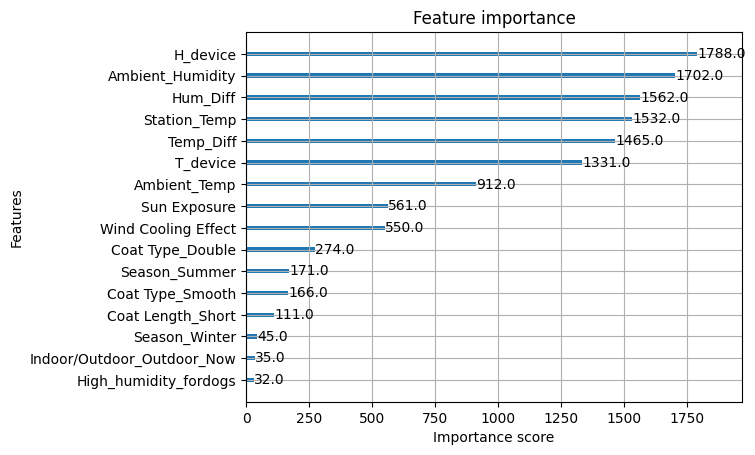

In [134]:
from xgboost import plot_importance

plt.figure(figsize=(10,8))
plot_importance(xgb_model, max_num_features=20)
plt.show()


In [133]:
# Try on 3-class target
from xgboost import XGBClassifier

xgb_model_3 = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',   # IMPORTANT
    num_class=3,                  # IMPORTANT
    random_state=42
)
xgb_model_3.fit(X3_train_res, y3_train_res)
y3_pred = xgb_model_3.predict(X3_test)


print(classification_report(y3_test, y3_pred))


              precision    recall  f1-score   support

           0       0.27      0.45      0.34       222
           1       0.16      0.50      0.24        10
           2       0.92      0.83      0.88      1640

    accuracy                           0.78      1872
   macro avg       0.45      0.59      0.49      1872
weighted avg       0.84      0.78      0.81      1872



<Figure size 1000x800 with 0 Axes>

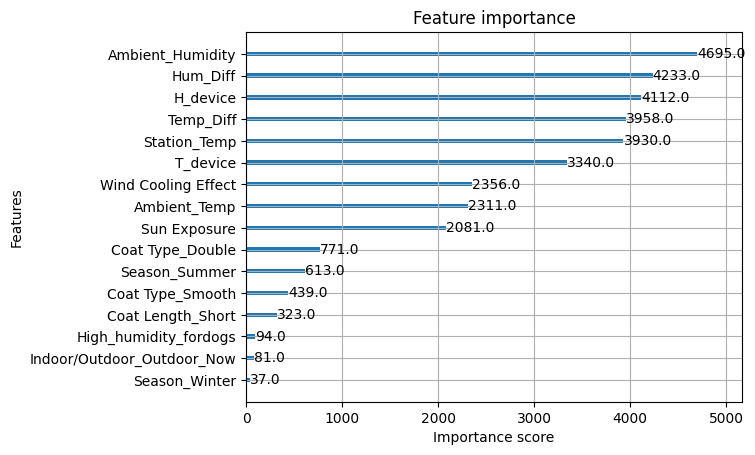

In [135]:
from xgboost import plot_importance

plt.figure(figsize=(10,8))
plot_importance(xgb_model_3, max_num_features=20)
plt.show()

In [ ]:
# Swapnil

In [ ]:
# Kedar

In [ ]:
# Manaswi